In [1]:
import sys
import time as t
import psutil
import json
import ijson
import ujson
import orjson
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterator
import struct

In [29]:
array = [1.234567, 3.098765, 4.567891, 2.256601]
print(sys.getsizeof(array))
pack_data = struct.pack('d' * len(array), *array)
print(type(pack_data))
print(sys.getsizeof(pack_data))
unpack_data = list(struct.unpack('d' * len(array), pack_data))
print(unpack_data)
print(sys.getsizeof(unpack_data))
print(type(unpack_data), type(unpack_data[0]))

120
<class 'bytes'>
65
[1.234567, 3.098765, 4.567891, 2.256601]
88
<class 'list'> <class 'float'>


In [6]:
with open(r"C:\Users\admin\Desktop\SSDD_coco\SSDD_coco\001160.json") as f:
    ori_data = json.load(f)
    matrix = []
    for shape in ori_data["shapes"]:
        for poi in shape["points"]:
            matrix.append(poi)
    print(matrix)
    print(sys.getsizeof(matrix))

[[131.08108108108107, 57.567567567567565], [137.83783783783784, 50.54054054054054], [144.59459459459458, 45.13513513513513], [149.45945945945945, 39.45945945945946], [148.64864864864865, 32.7027027027027], [143.78378378378378, 32.43243243243243], [137.02702702702703, 37.027027027027025], [129.7297297297297, 45.4054054054054], [125.94594594594594, 50.0], [34.32432432432432, 67.02702702702702], [36.486486486486484, 60.54054054054054], [32.97297297297297, 56.486486486486484], [21.08108108108108, 54.86486486486486], [15.945945945945946, 53.51351351351351], [14.324324324324323, 58.37837837837838], [18.37837837837838, 62.16216216216216], [25.945945945945944, 65.67567567567568], [108.91891891891892, 118.64864864864865], [105.4054054054054, 113.24324324324324], [92.7027027027027, 112.16216216216216], [83.24324324324324, 113.24324324324324], [81.89189189189189, 116.75675675675676], [83.78378378378378, 119.72972972972973], [97.02702702702702, 122.43243243243242], [105.4054054054054, 122.43243243

In [5]:
a = np.array(matrix)
print(a)
print(sys.getsizeof(a))

[[131.08108108  57.56756757]
 [137.83783784  50.54054054]
 [144.59459459  45.13513514]
 [149.45945946  39.45945946]
 [148.64864865  32.7027027 ]
 [143.78378378  32.43243243]
 [137.02702703  37.02702703]
 [129.72972973  45.40540541]
 [125.94594595  50.        ]
 [ 34.32432432  67.02702703]
 [ 36.48648649  60.54054054]
 [ 32.97297297  56.48648649]
 [ 21.08108108  54.86486486]
 [ 15.94594595  53.51351351]
 [ 14.32432432  58.37837838]
 [ 18.37837838  62.16216216]
 [ 25.94594595  65.67567568]
 [108.91891892 118.64864865]
 [105.40540541 113.24324324]
 [ 92.7027027  112.16216216]
 [ 83.24324324 113.24324324]
 [ 81.89189189 116.75675676]
 [ 83.78378378 119.72972973]
 [ 97.02702703 122.43243243]
 [105.40540541 122.43243243]
 [ 78.91891892 220.27027027]
 [ 81.35135135 214.59459459]
 [ 82.97297297 204.59459459]
 [ 83.51351351 195.94594595]
 [ 82.43243243 188.64864865]
 [ 78.91891892 193.51351351]
 [ 76.48648649 200.27027027]
 [ 75.40540541 208.91891892]
 [ 74.32432432 217.56756757]
 [ 73.24324324

In [10]:
with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\test2017.json") as f1:
    ori_data1 = json.load(f1)
    matrix1 = []
    matrix2 = []
    for shape in ori_data1["annotations"]:
        matrix2.append(shape["bbox"])
        for poi in shape["segmentation"][0]:
            matrix1.append(poi)
    print(type(matrix1), sys.getsizeof(matrix1))
    matrix1 = np.reshape(matrix1,(-1,2))
    matrix2 = np.reshape(matrix2,(-1,4))
    print('segmentation')
    print(type(matrix1), sys.getsizeof(matrix1))
    print(matrix1)
    print('bbox')
    print(sys.getsizeof(matrix2))

<class 'list'> 9504856
<class 'numpy.ndarray'> 120
[[254.          79.        ]
 [253.          80.        ]
 [252.          80.        ]
 ...
 [379.43037975 125.47468354]
 [381.64556962 126.89873418]
 [384.01898734 127.84810127]]
120


In [2]:
t0 = t.time()

with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\train_test2017.json","r") as f1:
    json_data1 = f1.read()
    data1 = json.loads(json_data1)
    matrix1 = []
    for shape in data1["annotations"]:
        for poi in shape["segmentation"][0]:
            matrix1.append(poi)


t1 = t.time()

with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\train_test2017.json","r") as f2:
    matrix2 = list(ijson.items(f2, 'annotations.item.segmentation.item', use_float = True))

t2 = t.time()

with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\train_test2017.json","r") as f3:
    json_data3 = f3.read()
    data3 = ujson.loads(json_data3)
    matrix3 = []
    for shape in data3["annotations"]:
        for poi in shape["segmentation"][0]:
            matrix3.append(poi)

t3 = t.time()

with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\train_test2017.json","r") as f4:
    json_data4 = f4.read()
    data4 = orjson.loads(json_data4)
    matrix4 = []
    for shape in data4["annotations"]:
        for poi in shape["segmentation"][0]:
            matrix4.append(poi)

t4 = t.time()

print('json parser time:', t1 - t0, 'ijson parser time:', t2 - t1, 'ujson parser time:', t3 - t2, 'orjson parser time:', t4 - t3)
print('length of matrix1:', len(matrix1), 'length of matrix2:', len(matrix2), 'length of matrix3:', len(matrix3), 'length of matrix4:', len(matrix4))
#print(matrix2[0])

json parser time: 1.678027868270874 ijson parser time: 21.070758819580078 ujson parser time: 1.2057316303253174 orjson parser time: 1.185866117477417
length of matrix1: 2994658 length of matrix2: 16951 length of matrix3: 2994658 length of matrix4: 2994658


In [28]:
with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\train_test2017.json") as f1:
    ori_data1 = json.load(f1)
    matrix1 = []
    for shape in ori_data1["annotations"]:
        for poi in shape["segmentation"][0]:
            matrix1.append(poi)

print(type(matrix1[0]), 'length of list:', len(matrix1),', size of float:', sys.getsizeof(matrix1))
matrix2 = list(map(int, matrix1))
print(type(matrix2[0]), 'length of list:', len(matrix2),', size of int:', sys.getsizeof(matrix2))
matrix3 = struct.pack('d' * len(matrix1), *matrix1)
print(type(matrix3), 'size in bites:', struct.calcsize('d'),', size of bytes:', sys.getsizeof(matrix3))
matrix4 = list(struct.unpack('d' * len(matrix1), matrix3))
print(type(matrix4), 'size in bites:', struct.calcsize('d'),', size of bytes:', sys.getsizeof(matrix4))

#print(matrix1[-1], matrix4[-1])

# print('float:', matrix1[-1], 'int:', matrix2[-1])

matrix1 = np.array(matrix1)
matrix2 = np.array(matrix1, dtype = np.float32)
matrix3 = np.array(matrix1, dtype = np.int64)
matrix4 = np.array(matrix1, dtype = np.int32)
print(type(matrix1),'length of array:', len(matrix1),', size of float64:', sys.getsizeof(matrix1))
print(type(matrix2),'length of array:', len(matrix2),', size of float32:', sys.getsizeof(matrix2))
print(type(matrix3),'length of array:', len(matrix3),', size of int64:', sys.getsizeof(matrix3))
print(type(matrix4),'length of array:', len(matrix4),', size of int32:', sys.getsizeof(matrix4))

#matrix1 = np.reshape(matrix1, (-1,2))
#print('np.float64:', matrix1)
#matrix2 = np.reshape(matrix2, (-1,2))
#print('np.float32:', matrix2)

<class 'float'> length of list: 2994658 , size of float: 24387832
<class 'int'> length of list: 2994658 , size of int: 24387832
<class 'bytes'> size in bites: 8 , size of bytes: 23957297
<class 'list'> size in bites: 8 , size of bytes: 23957320
<class 'numpy.ndarray'> length of array: 2994658 , size of float64: 23957368
<class 'numpy.ndarray'> length of array: 2994658 , size of float32: 11978736
<class 'numpy.ndarray'> length of array: 2994658 , size of int64: 23957368
<class 'numpy.ndarray'> length of array: 2994658 , size of int32: 11978736


In [6]:
with open(r"C:\Users\admin\Desktop\HRSID_JPG\HRSID_JPG\annotations\train_test2017.json") as f1:
    ori_data1 = json.load(f1)
    matrix1 = []
    for poi in ori_data1["annotations"][0]["segmentation"][0]:
        matrix1.append(poi)

matrix2 = struct.pack('d' * len(matrix1), *matrix1)
matrix3 = list(struct.unpack('d' * len(matrix1), matrix2))

print(sys.getsizeof(matrix1), sys.getsizeof(matrix2), sys.getsizeof(matrix3))

1432 1377 1400


14.324324324324323 149.45945945945945 32.43243243243243 223.78378378378378
<class 'list'> 43 472
<class 'numpy.ndarray'> 43 808


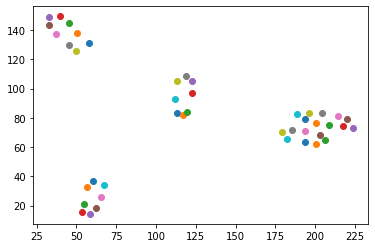

In [18]:
with open(r"C:\Users\admin\Desktop\SSDD_coco\SSDD_coco\001160.json") as f:
    ori_data = json.load(f)
    matrix = []
    for shape in ori_data["shapes"]:
        for poi in shape["points"]:
            matrix.append(poi)
            plt.scatter(poi[1], poi[0])
    #print(matrix)
print(min([row[0] for row in matrix]), max([row[0] for row in matrix]), min([row[1] for row in matrix]), max([row[1] for row in matrix]))

print(type(matrix), len(matrix), sys.getsizeof(matrix))
a = np.array(matrix)
print(type(a), len(matrix), sys.getsizeof(a))
#print(a.shape)